# scikit-learnで線形回帰（単回帰分析・重回帰分析）

**線形回帰モデル**とは説明変数の値から目的変数の値を予測するモデル。  
特に説明変数が１つだけの場合を**単回帰分析**、説明変数が２変数以上で構成される場合を**重回帰分析**と呼ぶ。  

## scikit-learnを用いた線形回帰
scikit-learnには、線形回帰による予測を行うクラスとして、`sklearn.linear_model.LinearRegression`が用意されている。


```
sklearn.linear_model.LinearRegression（fit_intercept=True, normalize=False,　copy_X=True, n_jobs=1)

```




In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


|column|name|
|:--|--:|
|fixed acidity|	酒石酸濃度|
|volatile acidity|	酢酸酸度|
|citric acid|	クエン酸濃度|
|residual sugar|	残留糖濃度|
|chlorides|	塩化物濃度|
|free sulfur dioxide|	遊離亜硫酸濃度|
|total sulfur dioxide|	亜硫酸濃度|
|density|	密度|
|pH|	pH|
|sulphates|	硫酸塩濃度|
|alcohol|	アルコール度数|
|quality|	0-10 の値で示される品質のスコア|


In [0]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
wine.shape

(1599, 12)

## 単回帰分析

In [8]:
# sklearn.linear_model.LinearRegression 　クラスを読み込む
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 説明変数に"density(濃度)"を追加
# locでデータフレームとして取得し、valuesでarrayに変換
X = wine.loc[:, ['density']].values

# 目的変数に"alcohol(アルコール度数)"を利用
Y = wine['alcohol'].values

# 予測モデルを作成(線形回帰モデルの当てはめを実行)
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片（誤差）
print(clf.intercept_)

# 決定係数
print(clf.score(X, Y))

[-280.16382307]
289.67534338256456
0.2461943643971065


上記結果より、以下のような回帰式が求められた。  
```
[alcohol] = -280.16382307 ×　[density] + 289.67534338256456
```

### 結果のプロット　

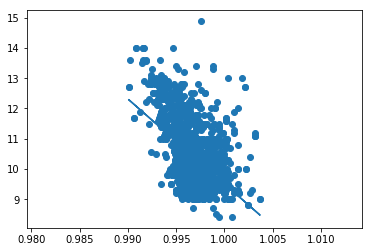

In [9]:
import matplotlib.pyplot as plt

# 散布図
plt.scatter(X, Y)

# 回帰直線
# predict(X): 作成したモデルを利用して予測を実行
plt.plot(X, clf.predict(X))

### アルコール濃度とpHの単回帰モデル

In [10]:
# 説明変数をpH、目的変数をalcoholとする
X = wine.loc[:, ['pH']].values

Y = wine['alcohol'].values

# 予測モデル作成
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片
print(clf.intercept_)

# 決定係数
print(clf.score(X, Y))

[1.41939838]
5.723194410330933
0.042284728554263684


[alcohol] = 1.41939838 × [pH] + 5.723194410330933

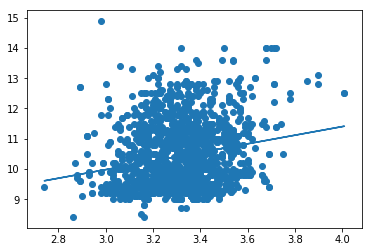

In [11]:
# 散布図
plt.scatter(X, Y)
# 回帰直線
plt.plot(X, clf.predict(X))

## 重回帰分析
qualityを目的変数に、それ以外を説明変数にして重回帰分析を行う。

In [12]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 説明変数に'quality'以外
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values

# 目的変数に'quality'
Y = wine['quality'].values

# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
print(pd.DataFrame({"Name": wine_except_quality.columns,
                                     "Coefficients": clf.coef_}).sort_values(by='Coefficients'))

# 切片（誤差）
print(clf.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.965208449451815


つまりワインの品質スコアは以下のような回帰式で表される

[quality] = -17.881164 × [density] + -1.874225 × [chlorides] +
            -1.083590 × [volatile acidity] + -0.413653 × [pH] + 
            -0.182564 × [citric acid] + -0.003265 × [total sulfur dioxide] + 
            0.004361 × [free sulfur dioxide] + 0.016331 × [residual sugar] + 
            0.024991 × [fixed acidity] + 0.276198 × [alcohol] + 
            0.916334 × [sulphates] + 21.9652084495

### 各変数がどの程度目的変数に影響しているか確認
各変数を正規化し、平均=０、標準偏差=１（＝標準正規分布）になるように変換した上で、重回帰分析を行うと偏回帰係数の大小で比較することができる

データの正規化参考：https://mathwords.net/dataseikika

In [3]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# データフレームの各列を正規化（最大値を１、最小値を０にするやり方）
wine2 = wine.apply(lambda x: (x - np.max(x)) / (np.max(x) - np.min(x)))
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.752212,-0.602740,-1.00,-0.931507,-0.893155,-0.859155,-0.901060,-0.432452,-0.393701,-0.862275,-0.846154,-0.6
1,-0.716814,-0.479452,-1.00,-0.883562,-0.856427,-0.661972,-0.784452,-0.505874,-0.637795,-0.790419,-0.784615,-0.6
2,-0.716814,-0.561644,-0.96,-0.904110,-0.866444,-0.802817,-0.830389,-0.491189,-0.590551,-0.808383,-0.784615,-0.6
3,-0.415929,-0.890411,-0.44,-0.931507,-0.894825,-0.774648,-0.809187,-0.417768,-0.669291,-0.850299,-0.784615,-0.4
4,-0.752212,-0.602740,-1.00,-0.931507,-0.893155,-0.859155,-0.901060,-0.432452,-0.393701,-0.862275,-0.846154,-0.6


In [13]:
# 説明変数に"quality(品質スコア以外全て)''を利用
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality.values

# 目的変数に"quality" を利用
Y = wine2['quality'].values

#  予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
print(pd.DataFrame({"Name": wine2_except_quality.columns,
                                    "Coefficients": np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片（誤差）
print(clf.intercept_)

NameError: ignored

正規化した偏回帰係数を確認すると、alcohol(アルコール度数)が最も高い数値を示し、品質に大きな影響を与えていることがわかる。